## Deep Learning- CNN using DenseNet

In [0]:
%tensorflow_version 2.x  

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from time import time
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
import keras
#from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from time import time
import numpy as np

[9]


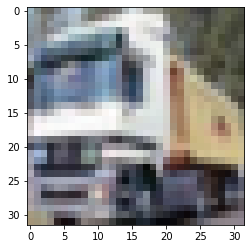

In [0]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

print(train_labels[1])
plt.imshow(train_images[1], cmap="Greys_r")

data = train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255
lbl = train_labels.astype(np.int32)


test_data = test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255
test_lbl = test_labels.astype(np.int32)

# Input Layer

In [0]:
inp = tf.keras.layers.Input((32, 32, 3))
x = tf.keras.layers.Conv2D(64, 7, strides=2, padding='same')(inp)
x = tf.keras.layers.MaxPool2D(3, strides=2, padding='same')(x)

# 1st Dense Block

## For Conv 1x1

In [0]:
f=32
x1 = tf.keras.layers.BatchNormalization()(x)
x1 =tf.keras.layers.ReLU()(x)
x1 = tf.keras.layers.Conv2D(f*4,1,strides=1, padding='same')(x)

## For Conv 3x3

In [0]:
f=32
k=3
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 =tf.keras.layers.ReLU()(x1)
x1= tf.keras.layers.Conv2D(f*4,k,strides=1, padding='same')(x1) #Filter times 4 as per the paper

## Concatinating Input Layer & Conv. Layer

In [0]:
tensor1 = tf.keras.layers.concatenate([x, x1])  #x=input layer, x1=conv. layer

# Transition Layer

In [0]:
p='same'
s=1
trans1 = tf.keras.layers.BatchNormalization()(tensor1)
trans1 =tf.keras.layers.ReLU()(trans1)
trans1 = tf.keras.layers.Conv2D(16, 1, strides=s, padding=p)(trans1) #Filter size 16 as we have to half the filter (32 from 16)
trans1 = tf.keras.layers.AvgPool2D(2, strides=2, padding=p)(trans1)

# 2nd Dense Block

In [0]:
f=32
x2 = tf.keras.layers.BatchNormalization()(trans1)
x2 =tf.keras.layers.ReLU()(x2)
x2 = tf.keras.layers.Conv2D(f*4,1,strides=1, padding='same')(x2)

f=32
k=3
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 =tf.keras.layers.ReLU()(x2)
x2= tf.keras.layers.Conv2D(f*4,k,strides=1, padding='same')(x2)

tensor2 = tf.keras.layers.concatenate([trans1, x2])



In [0]:
global_average_pool = tf.keras.layers.GlobalAvgPool2D()(tensor2)

In [0]:
flat = tf.keras.layers.Flatten()(global_average_pool)
out = tf.keras.layers.Dense(10)(flat)
model = tf.keras.Model(inp, out)

In [0]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_115 (Conv2D)             (None, 16, 16, 64)   9472        input_12[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_115[0][0]                 
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 8, 8, 128)    8320        max_pooling2d_9[0][0]            
___________________________________________________________________________________________

In [0]:
opt = tf.optimizers.Adam()

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

train_acc_metric = tf.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=opt, loss=loss_fn, metrics=[train_acc_metric])

model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4388 - sparse_categorical_accuracy: 0.4787
Epoch 2/2
1563/1563 [==============================] - 157s 100ms/step - loss: 1.1081 - sparse_categorical_accuracy: 0.6020


In [0]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 19ms/step - loss: 1.9302 - sparse_categorical_accuracy: 0.4733


[1.9302091598510742, 0.4733000099658966]